# 1. Tải và nhập tập dữ liệu

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
!pip install opendatasets

In [95]:
import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data') # cần Username và key

Skipping, found downloaded files in "./gtsrb-german-traffic-sign" (use force=True to force download)


In [96]:
# Thư viện
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Hình ảnh
import cv2
from PIL import Image

# Vẽ đồ thị
import matplotlib.pyplot as plt

# Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# 2. Tải tập dữ liệu (Hình ảnh biển báo giao thông)

In [97]:
# Biến
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Hình ảnh và nhãn
for i in range(classes):
    path = os.path.join('/content/gtsrb-german-traffic-sign/','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Lỗi")

#Chuyển đổi danh sách thành mảng
data = np.array(data)
labels = np.array(labels)

# 3. Tách dữ liệu

In [98]:
# Kiểm tra dữ liệu
print(data.shape, labels.shape)

# Chia tập dữ liệu train và test tỉ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Hiển thị hình dạng sau khi tách
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Chuyển đổi nhãn one hot coding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# 4. Tạo mô hình

In [99]:
# Model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hiển thị mô hình
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 11, 11, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

# 5. Huấn luyện mô hình


In [100]:
with tf.device('/GPU:0'):
    epochs = 30
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
981/981 [==============================] - 14s 11ms/step - loss: 1.7713 - accuracy: 0.5658 - val_loss: 0.2952 - val_accuracy: 0.9287
Epoch 2/30
981/981 [==============================] - 12s 12ms/step - loss: 0.4475 - accuracy: 0.8723 - val_loss: 0.1136 - val_accuracy: 0.9742
Epoch 3/30
981/981 [==============================] - 9s 10ms/step - loss: 0.2767 - accuracy: 0.9211 - val_loss: 0.0761 - val_accuracy: 0.9807
Epoch 4/30
981/981 [==============================] - 6s 6ms/step - loss: 0.2441 - accuracy: 0.9335 - val_loss: 0.0721 - val_accuracy: 0.9832
Epoch 5/30
981/981 [==============================] - 6s 6ms/step - loss: 0.1966 - accuracy: 0.9470 - val_loss: 0.0647 - val_accuracy: 0.9837
Epoch 6/30
981/981 [==============================] - 7s 7ms/step - loss: 0.2147 - accuracy: 0.9451 - val_loss: 0.0661 - val_accuracy: 0.9819
Epoch 7/30
981/981 [==============================] - 5s 6ms/step - loss: 0.1959 - accuracy: 0.9496 - val_loss: 0.0586 - val_accuracy: 0.9852
E

# 6. Hiệu suất của mô hình trong giai đoạn train

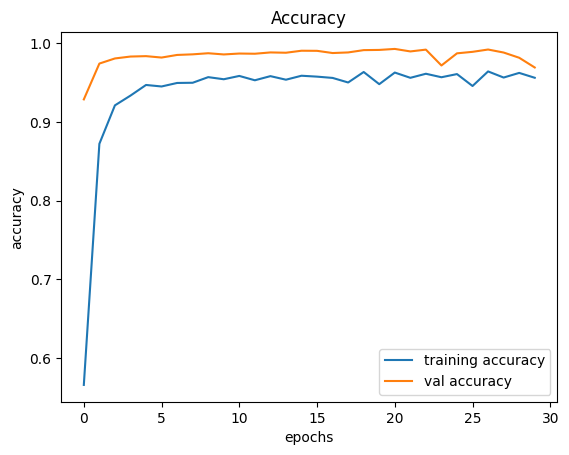

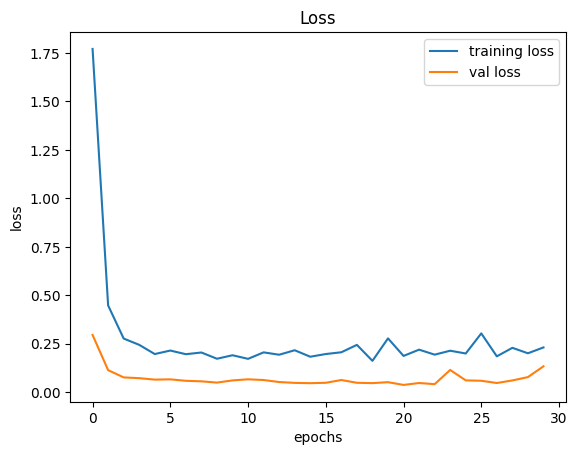

In [101]:
# Vẽ biểu đồ hiệu suất
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# 7. Tập dữ liệu test và đánh giá mô hình

In [102]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("/content/gtsrb-german-traffic-sign/Test.csv")
test_labels = test['ClassId'].values.tolist()

test_img_path = "/content/gtsrb-german-traffic-sign"
test_imgs = test['Path'].values
test_data = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("accuracy: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 1s 2ms/step
accuracy:  0.9203483768804434


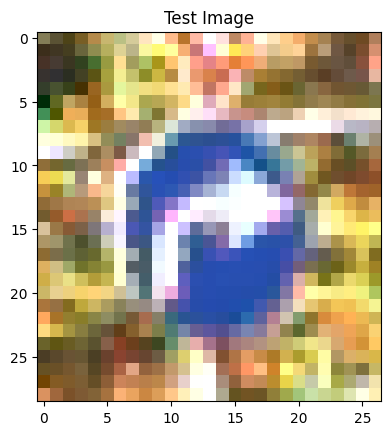

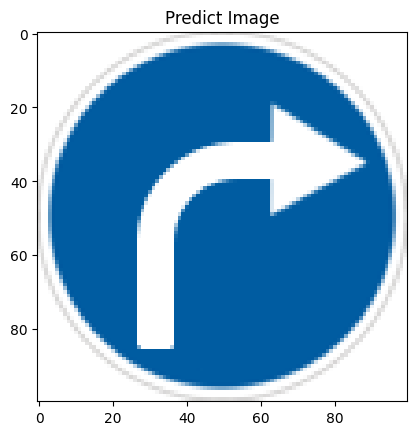

In [103]:
number_of_image_test = 3 #20

test_image_name = test_imgs[number_of_image_test]
image_label = test_labels[number_of_image_test]
plt.figure(0)
img_path = test_img_path + '/' + test_image_name
img = Image.open(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.figure(1)
img_pre = Image.open('/content/gtsrb-german-traffic-sign/Meta/' + str(classes_x[number_of_image_test]) + '.png')
plt.imshow(img_pre)
plt.title("Predict Image")
plt.show()

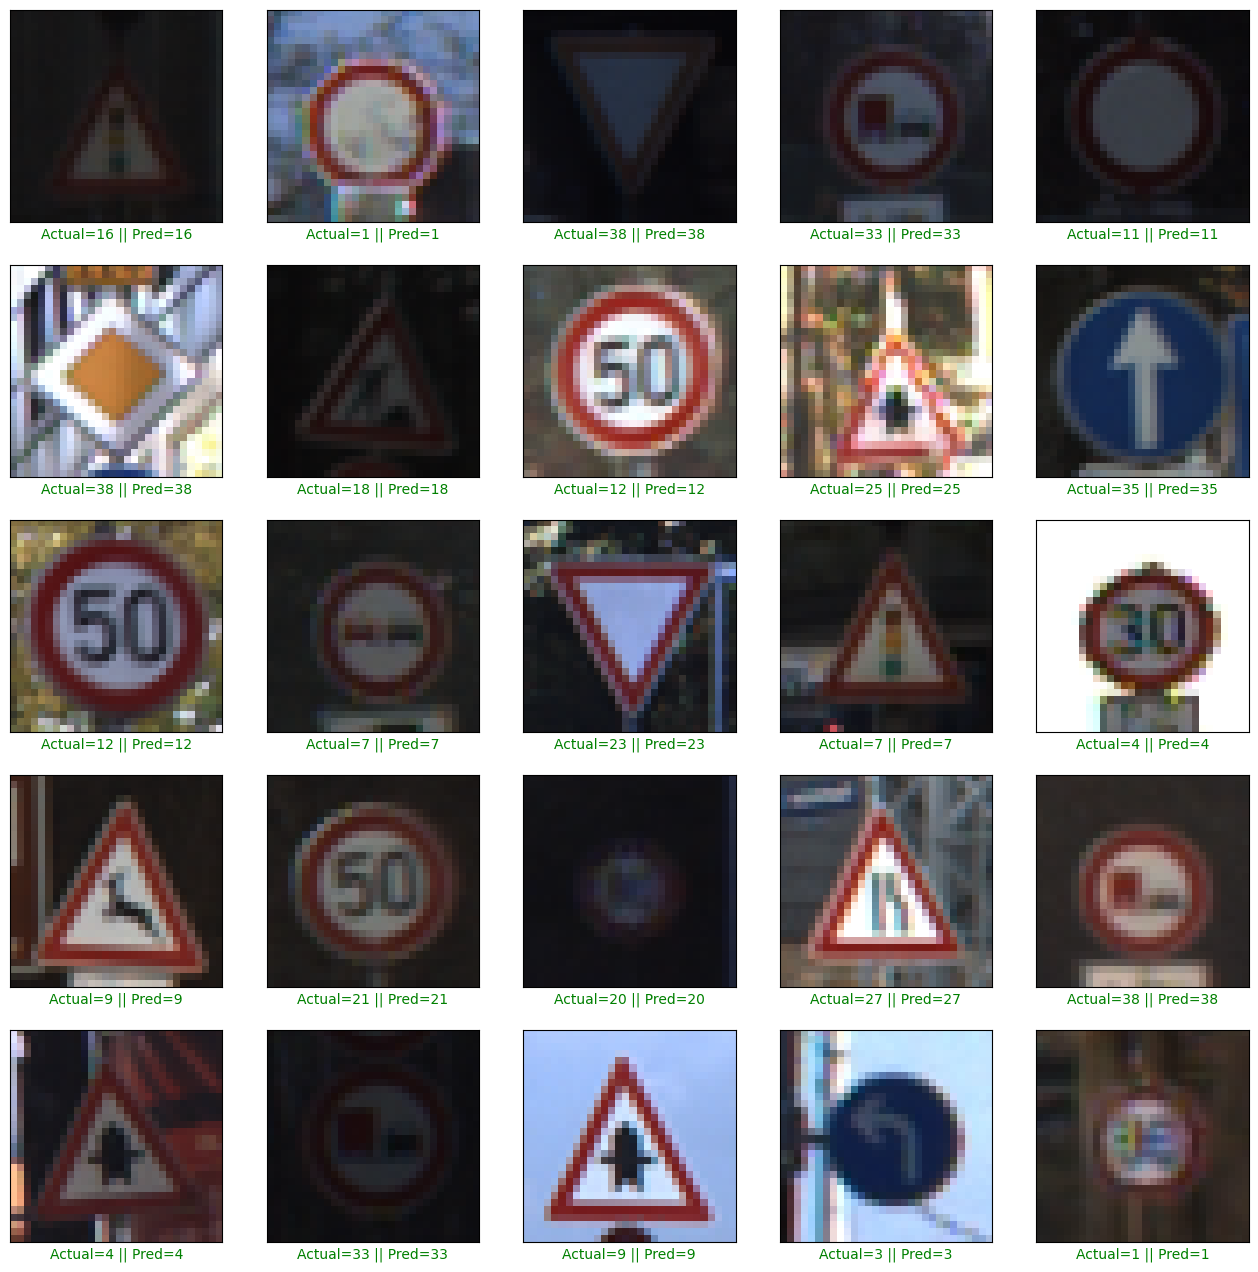

In [104]:
plt.figure(figsize = (16, 16))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

<Axes: >

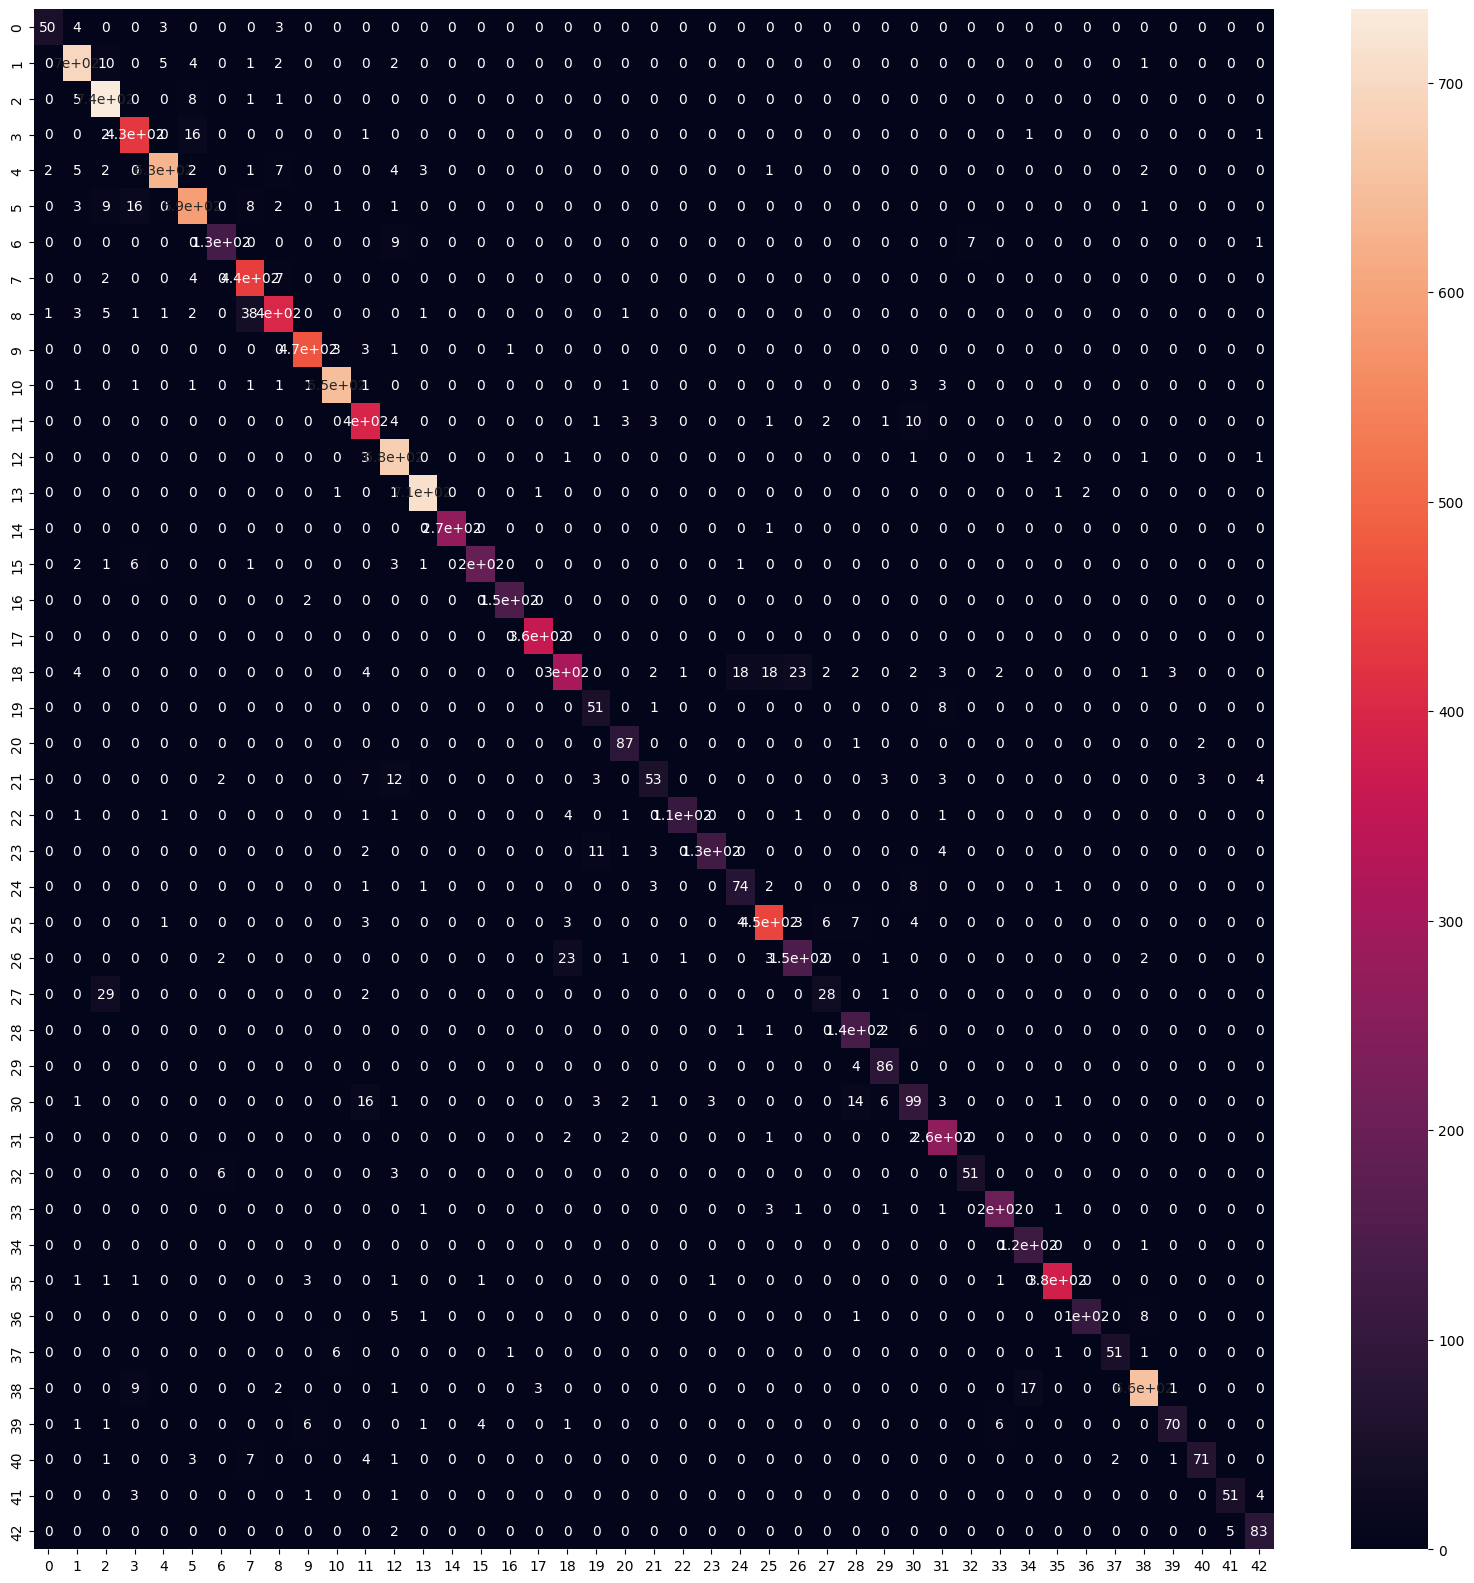

In [105]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_labels,pred)
import seaborn as sns
df_cm = pd.DataFrame(cf)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)